<a href="https://colab.research.google.com/github/THEABHASHARMA/CASE-STUDIES/blob/main/Casino_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Casino Case Study

A bag has 3 Red and 2 Blue balls.

You pick a ball, write its colour, and put it back in the bag. This is done 4 times in total.

If all 4 times, the Red balls was drawn, you win Rs 150.

Otherwise you lose Rs 10.

Question : Would engaging in this game result in a profit or loss for you?

# Discuss:

Problem mentions that once you've noted the color, you put it back in the bag
What does this mean in the probabillity language?
It means that the balls are drawn with replacement
The step of taking out the ball is repeated 4 times

Whether you end up gaining or losing will depend on how many red balls are drawn.

Therefore, let's define a random variable  𝑋  to denote the number of red balls drawn.

Hence,  𝑋  will be a discrete random variable.
Possible outcomes of  𝑋 :  0,1,2,3  or  4

# Empirical Approach

Though 7 heads is probable for 10 tosses, when a coin is tossed for 10,000 times, the number of heads should be approximately 5,000

This process of simulating the experiment, and repeating it multiple times, is done in an effort to calculate probability value (of getting heads in this example).

This value is known as Empirical Probability.



In [2]:
import math as m
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Let's simulate the given Casino problem using np.random.choice()

Since we have,

3 red balls and
2 blue balls
We can represent the possible outcomes as a list ["R", "R", "R", "B", "B"]

Since the ball is being drawn 4 times, we set size = 4

Notice that every time we execute the following code, we will get a different result, and they're being chosen randomly each time.

In [3]:
rolls=np.random.choice(["R","R","R","B","B"],size=4)
rolls

array(['R', 'B', 'R', 'R'], dtype='<U1')

Recall that  𝑋  represents the number of red balls drawn in a simulation.

How to evaluate  𝑋  from a simulation?
Create a Boolean mask having all observed "R" as True and "B" as False
Use np.count_nonzero() to count number of True in the mask.

In [4]:
# rolls=="R" creates a Boolean mask
# count_nonzero() counts the number of non-zero OR True elements in the passed list.
print(rolls=='R')
np.count_nonzero(rolls=="R")

[ True False  True  True]


3

# Let's take inspiration from the scientist and perform this simulation 10,000 times using a code, and note our observations.

Discuss:

We already know how to simulate a ball draw
Let's store the no of reds observed in a variable num_red
And store this value for all 10,000 simulations into a list red_values

In [5]:
red_values = []
for i in range(10000):
  rolls = np.random.choice(["R","R","R","B","B"],size=4)
  num_red=np.count_nonzero(rolls=="R")
  red_values.append(num_red)
pd.value_counts(red_values)

3    3557
2    3438
1    1556
4    1223
0     226
Name: count, dtype: int64

In [6]:
pd.value_counts(red_values,normalize=True)

3    0.3557
2    0.3438
1    0.1556
4    0.1223
0    0.0226
Name: proportion, dtype: float64

Based on this data, how many red balls we will get on an average based on simulations we have done 10,000 times?

In [7]:
# This is empirical value
np.mean(red_values)

2.3995

Until now, we simulated the event 10,000 times, and found an expected value of random variable X using the data observed.

This is known as the Empirical Approach of solving the problem.

# Theoretical Approach

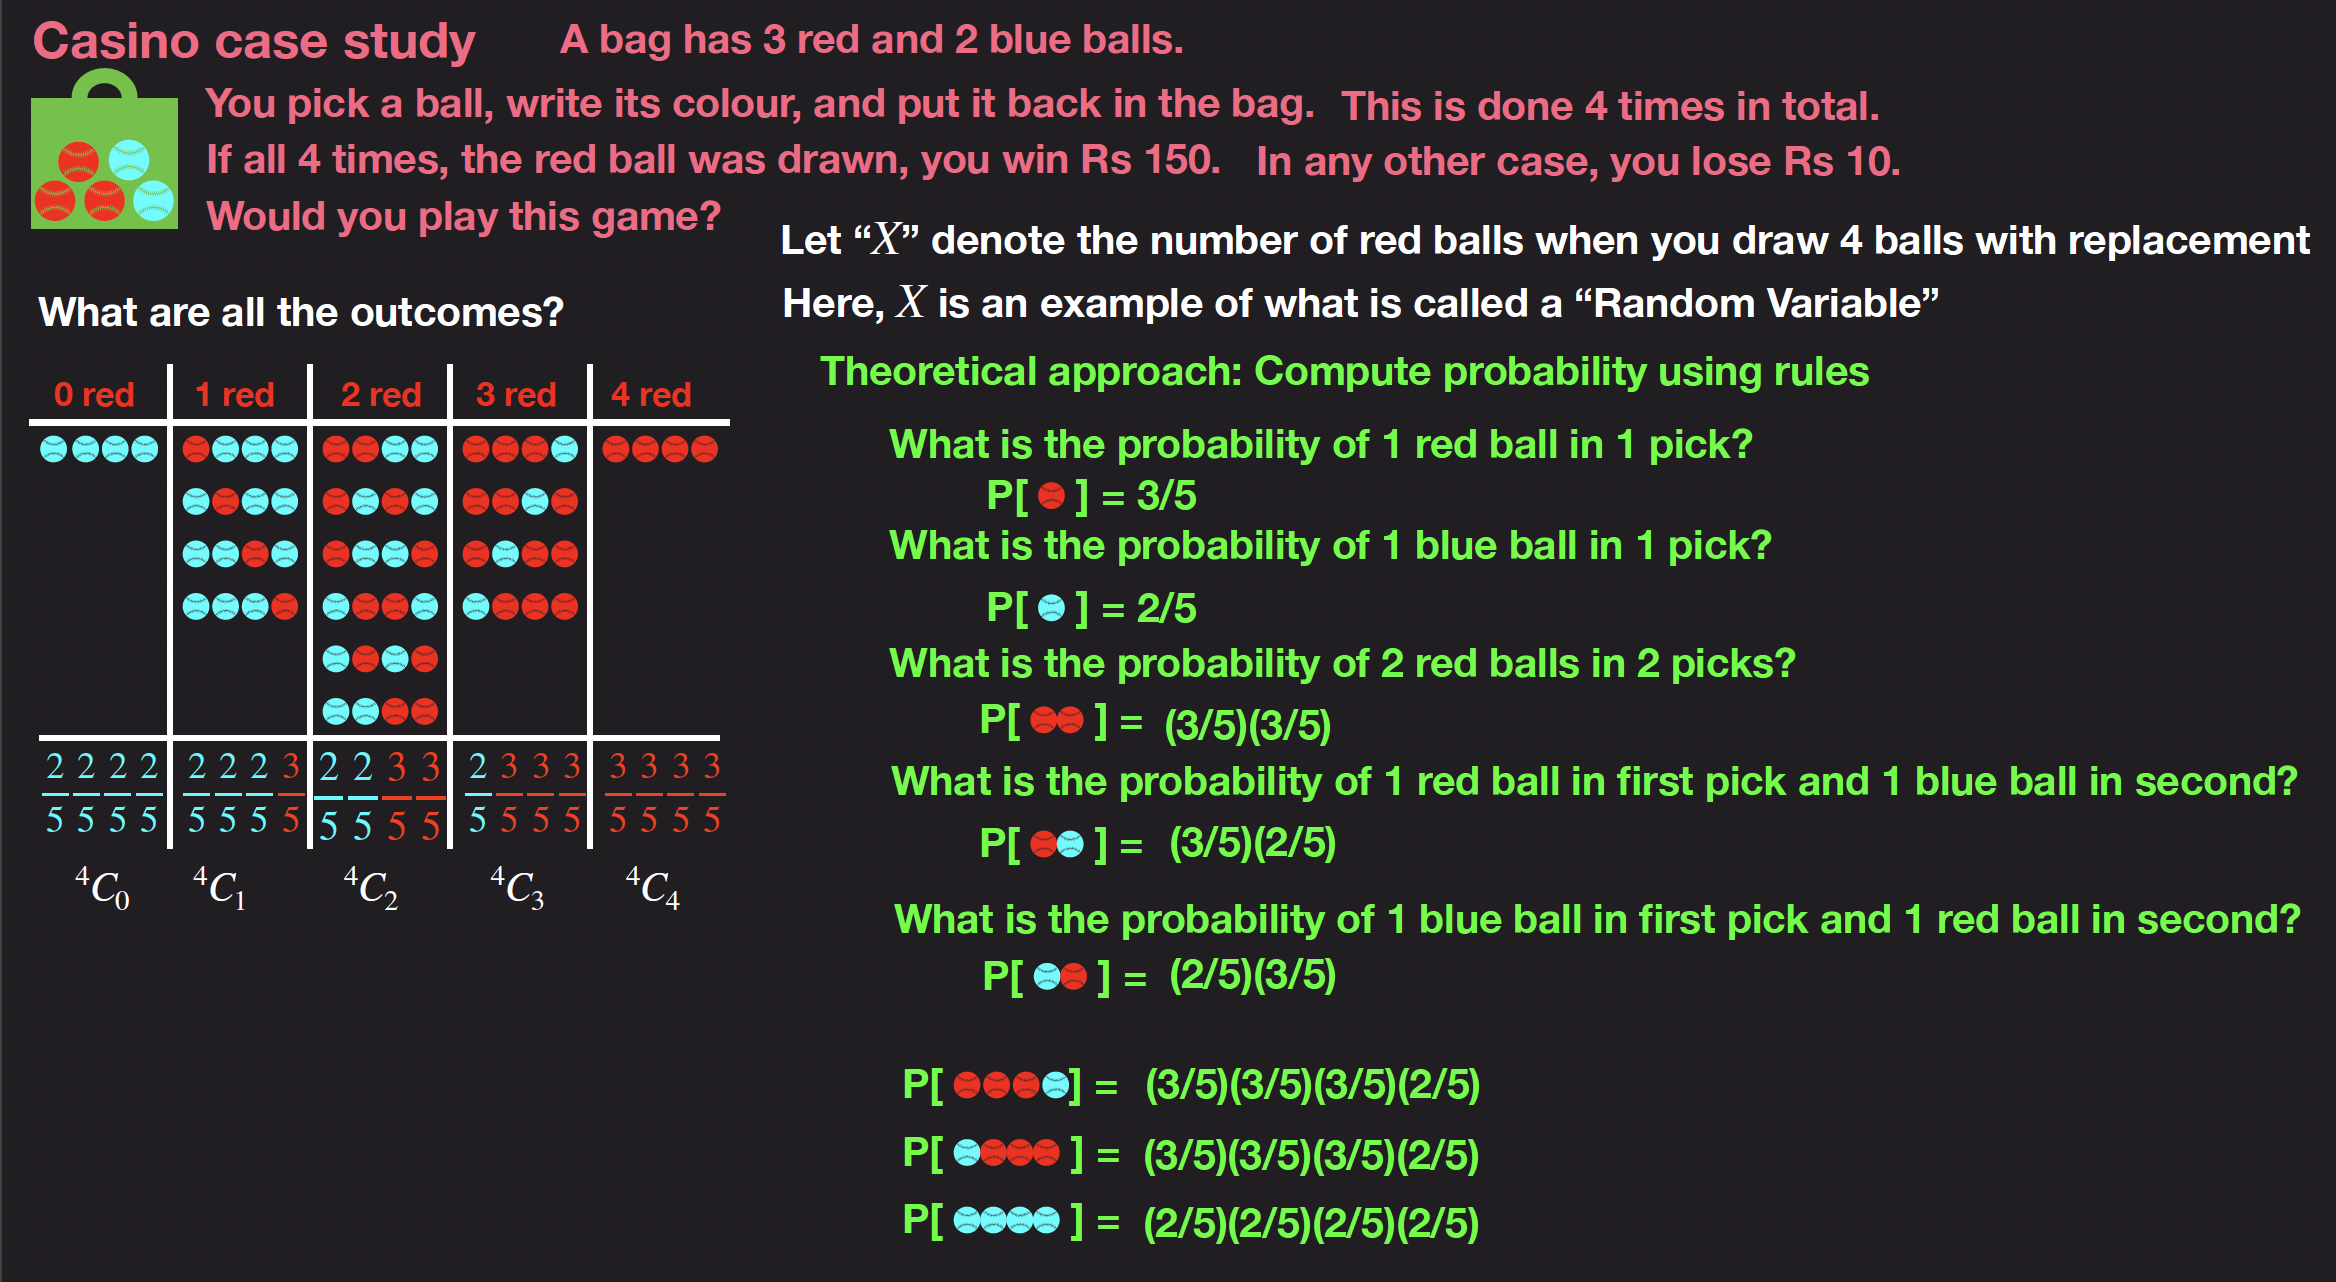

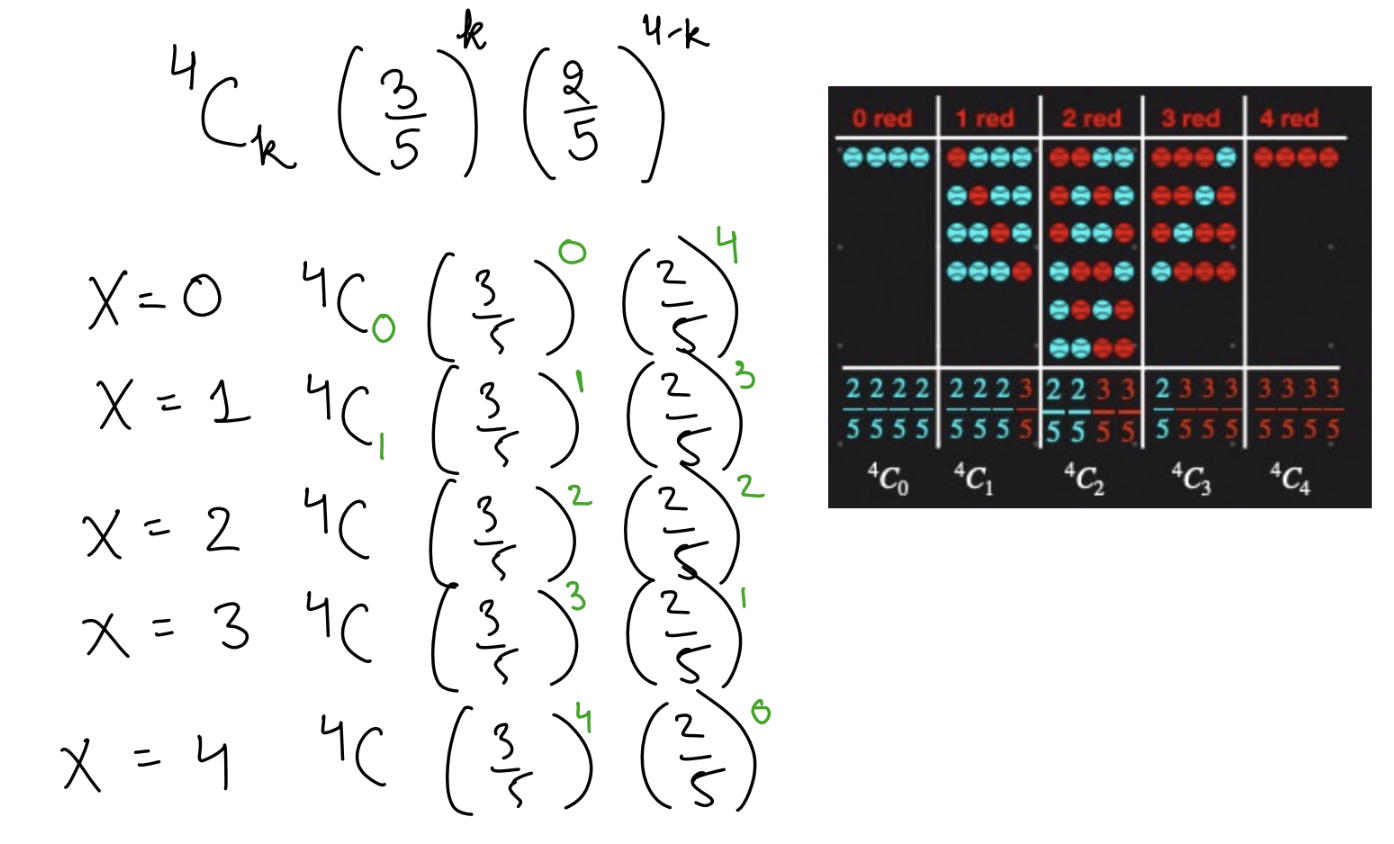

In [8]:
import math

math.comb(4, 0)
math.comb(4, 1)

4

Let's evaluate the probability values  𝑃(𝑋)  for all possible values of  𝑋={0,1,2,3,4}

In [9]:
# P(X=0)
math.comb(4,0)* (3/5)**0 * (2/5)**4

0.025600000000000005

In [10]:
# P(X=1)
math.comb(4,1)* (3/5)**1 * (2/5)**3

0.15360000000000004

In [11]:
# P(X=2)
math.comb(4,2)* (3/5)**2 * (2/5)**2

0.3456000000000001

In [12]:
# P(X=3)
math.comb(4,3)* (3/5)**3 * (2/5)**1

0.34559999999999996

In [13]:
# P(X=4)
math.comb(4,4)* (3/5)**4 * (2/5)**0

0.1296

Let's compare these probability results to what we evaluated through the Empirical approach

Notice that these values are very close.

As discussed earlier, if we increase the no of simulations, the observed result would be more and more closer to these theoretical values.

Hence, proved.



# Binomial Distribution

In [14]:
x = pd.value_counts(red_values, normalize=True)
x

3    0.3557
2    0.3438
1    0.1556
4    0.1223
0    0.0226
Name: proportion, dtype: float64

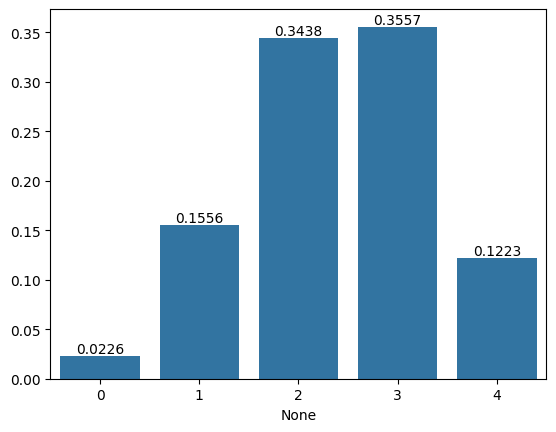

In [17]:
ax = sns.barplot(x = x.index, y = x.values)

for i in ax.containers:
  ax.bar_label(i,)

In [18]:
from scipy.stats import binom

In [19]:
prob_0_red = binom.pmf(n=4,p=3/5,k=0)
prob_0_red

0.025599999999999994

In [20]:
prob_1_red = binom.pmf(n=4,p=3/5,k=1)
prob_1_red

0.15359999999999996

In [21]:
prob_2_red = binom.pmf(n=4,p=3/5,k=2)
prob_2_red

0.3456

In [22]:
prob_3_red = binom.pmf(n=4,p=3/5,k=3)
prob_3_red

0.3456000000000001

In [23]:
prob_4_red = binom.pmf(n=4,p=3/5,k=4)
prob_4_red

0.1296

Notice that these values are the same as what we calculated using math.comb

Alternately, there is a built-in function to find this expected value in stats.binom

Here, we need to pass the following arguments to args:

n, and
p

In [24]:
binom.expect(args=(4,3/5))

2.4000000000000004

In [25]:
# P(Y=150)
prob_4_red

0.1296

In [26]:
#P(Y = -10)
1 - prob_4_red

0.8704000000000001

In [27]:
expected_y = (150*0.1296) + (-10*0.8704000000000001)
expected_y

10.735999999999997

# Conclusion of the case study:
This value means that if we play many many times, at the end of the day, we are expected to have profit of Rs 10.736